In [1]:
# 1. Import thư viện cần thiết
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

 # **8:2**

In [2]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('Eth.csv')
df1=df.reset_index()['Close']
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-01,136.836243,138.995270,136.434784,136.443619,136.443619,3756124824
1,2019-03-02,136.350082,137.184799,132.436386,134.206955,134.206955,3747176425
2,2019-03-03,134.786118,135.849289,131.328857,132.249420,132.249420,3454374053
3,2019-03-04,132.157883,132.729141,125.402702,127.774124,127.774124,4008171341
4,2019-03-05,127.792953,138.229980,126.735298,137.822388,137.822388,4764849990
...,...,...,...,...,...,...,...
1915,2024-05-28,3892.096924,3924.895752,3771.213867,3840.256348,3840.256348,19846044324
1916,2024-05-29,3840.235107,3880.648438,3742.041260,3763.196533,3763.196533,17411416736
1917,2024-05-30,3763.357666,3823.643311,3702.263672,3746.849609,3746.849609,15065849797
1918,2024-05-31,3746.861572,3843.857666,3723.835205,3760.026611,3760.026611,15290700646


In [3]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [4]:
# 4. Chia train test
train_size = int(0.8 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

In [5]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [6]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [7]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [8]:
# 8. Define LSTM Model

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [9]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
23/23 [==============================] - 16s 367ms/step - loss: 0.0354 - val_loss: 0.0029
Epoch 2/100
23/23 [==============================] - 4s 190ms/step - loss: 0.0045 - val_loss: 0.0029
Epoch 3/100
23/23 [==============================] - 4s 180ms/step - loss: 0.0029 - val_loss: 0.0035
Epoch 4/100
23/23 [==============================] - 6s 241ms/step - loss: 0.0027 - val_loss: 0.0022
Epoch 5/100
23/23 [==============================] - 4s 180ms/step - loss: 0.0024 - val_loss: 0.0021
Epoch 6/100
23/23 [==============================] - 4s 178ms/step - loss: 0.0022 - val_loss: 0.0020
Epoch 7/100
23/23 [==============================] - 6s 244ms/step - loss: 0.0023 - val_loss: 0.0018
Epoch 8/100
23/23 [==============================] - 4s 188ms/step - loss: 0.0023 - val_loss: 0.0019
Epoch 9/100
23/23 [==============================] - 5s 210ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 10/100
23/23 [==============================] - 5s 225ms/step - loss: 0.0018 - val_l

In [10]:
# 10. Dự báo dữ liệu test
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

9/9 [==============================] - 0s 35ms/step


In [11]:
# 11. Chuẩn hóa dữ liệu
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
ytest = scaler.inverse_transform(ytest.reshape(-1,1))

In [12]:
# 12. Đánh giá độ chính xác thuật toán
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)

test_mae = np.mean(abs(y_pred - ytest))
print('Testing MAE:', test_mae)

test_mape = np.mean(np.abs(y_pred - ytest)/np.abs(y_pred))
print('Testing MAPE:', test_mape)

Testing RMSE: 105.34059519894636
Testing MAE: 79.09645150659817
Testing MAPE: 0.030235462491947845


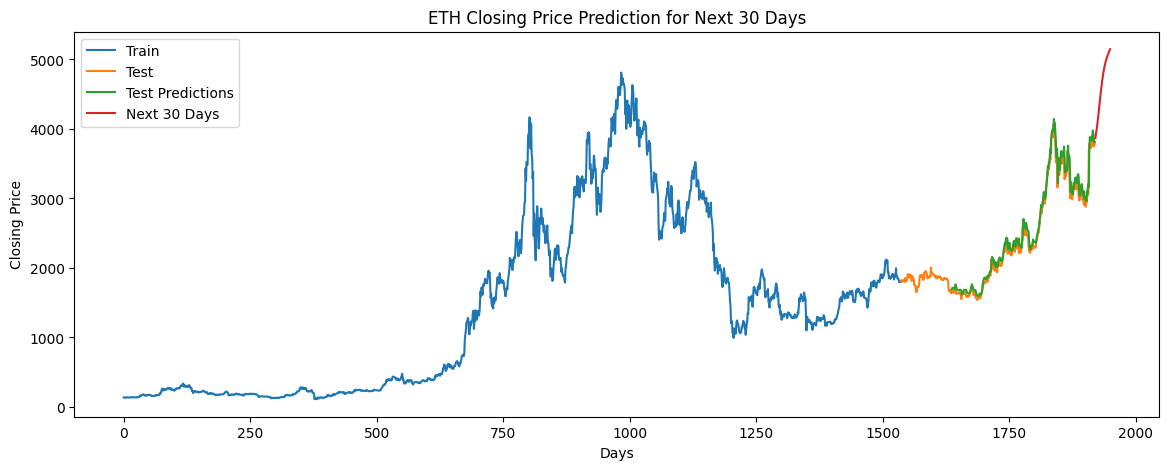

Predicted closing prices for the next 30 days:
[3868.5076 3921.1172 3973.2917 4027.0605 4084.0813 4145.156  4210.075
 4277.8545 4347.0996 4416.3447 4484.265  4549.779  4612.064  4670.54
 4724.832  4774.7534 4820.271  4861.4956 4898.6533 4932.0674 4962.1255
 4989.255  5013.8965 5036.478  5057.398  5077.0107 5095.615  5113.454
 5130.708  5147.5024]


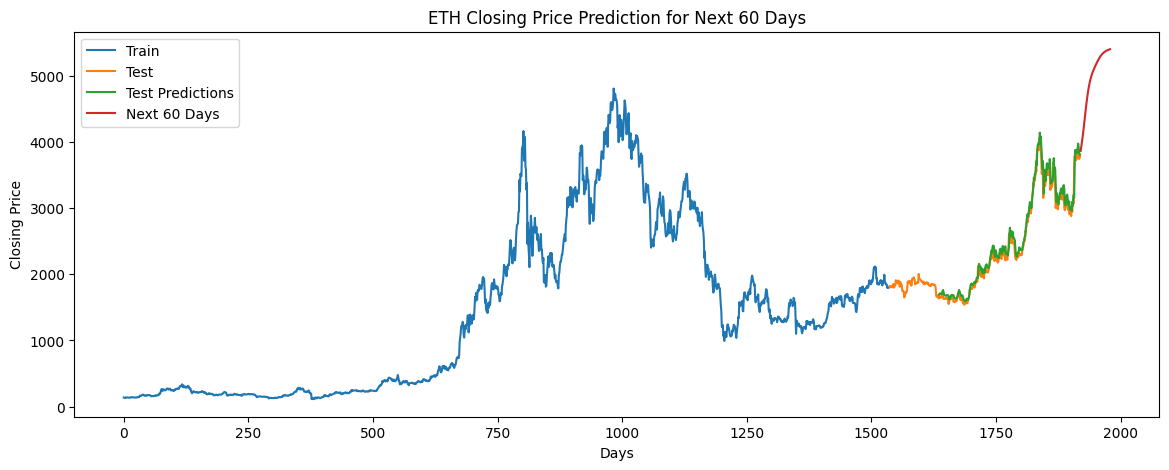

Predicted closing prices for the next 60 days:
[3868.5076 3921.1172 3973.2917 4027.0605 4084.0813 4145.156  4210.075
 4277.8545 4347.0996 4416.3447 4484.265  4549.779  4612.064  4670.54
 4724.832  4774.7534 4820.271  4861.4956 4898.6533 4932.0674 4962.1255
 4989.255  5013.8965 5036.478  5057.398  5077.0107 5095.615  5113.454
 5130.708  5147.5024 5163.914  5179.9746 5195.679  5210.9985 5225.886
 5240.282  5254.126  5267.362  5279.939  5291.816  5302.9644 5313.3726
 5323.037  5331.9707 5340.1934 5347.738  5354.6445 5360.9585 5366.7295
 5372.0044 5376.832  5381.2617 5385.338  5389.103  5392.594  5395.8423
 5398.879  5401.7236 5404.3984 5406.9204]


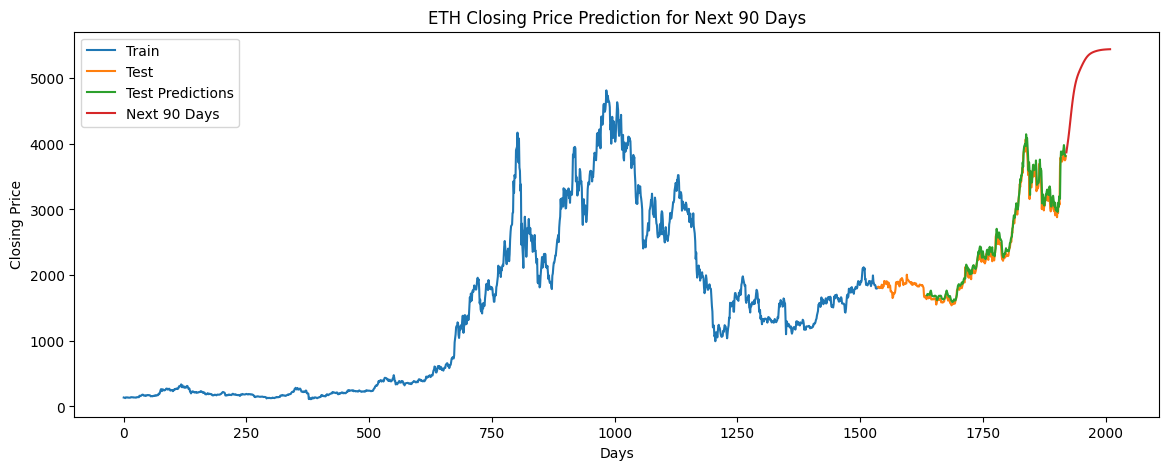

Predicted closing prices for the next 90 days:
[3868.5076 3921.1172 3973.2917 4027.0605 4084.0813 4145.156  4210.075
 4277.8545 4347.0996 4416.3447 4484.265  4549.779  4612.064  4670.54
 4724.832  4774.7534 4820.271  4861.4956 4898.6533 4932.0674 4962.1255
 4989.255  5013.8965 5036.478  5057.398  5077.0107 5095.615  5113.454
 5130.708  5147.5024 5163.914  5179.9746 5195.679  5210.9985 5225.886
 5240.282  5254.126  5267.362  5279.939  5291.816  5302.9644 5313.3726
 5323.037  5331.9707 5340.1934 5347.738  5354.6445 5360.9585 5366.7295
 5372.0044 5376.832  5381.2617 5385.338  5389.103  5392.594  5395.8423
 5398.879  5401.7236 5404.3984 5406.9204 5409.3    5411.5464 5413.668
 5415.671  5417.559  5419.336  5421.0054 5422.572  5424.0347 5425.4004
 5426.6714 5427.8516 5428.945  5429.9565 5430.888  5431.7505 5432.5444
 5433.2754 5433.9473 5434.5664 5435.1367 5435.6646 5436.152  5436.602
 5437.02   5437.407  5437.7656 5438.0996 5438.412  5438.7036]


In [13]:
# 13. Dự đoán 30, 60, 90 ngày tiếp theo
def predict_future(model, data, time_step, days):
    temp_input = list(data[:, 0])  # Extract the values as a 1D list
    lst_output = []
    i = 0
    while(i < days):
        if(len(temp_input) > time_step):
            x_input = np.array(temp_input[-time_step:])
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.append(yhat[0][0])  # Append the single predicted value
            lst_output.append(yhat[0][0])
            i = i + 1
        else:
            x_input = np.array(temp_input)
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.append(yhat[0][0])  # Append the single predicted value
            lst_output.append(yhat[0][0])
            i = i + 1
    return np.array(lst_output).reshape(-1, 1)

last_100_days = df1[-time_step:]
future_days = [30, 60, 90]
for days in future_days:
    future_predictions = predict_future(model, last_100_days, time_step, days)
    future_predictions = scaler.inverse_transform(future_predictions)

    # Vẽ hình
    plt.figure(figsize=(14, 5))
    plt.plot(range(len(train_data)), scaler.inverse_transform(train_data), label='Train')
    plt.plot(range(len(train_data), len(train_data) + len(test_data)), scaler.inverse_transform(test_data), label='Test')
    plt.plot(range(len(train_data) + time_step, len(train_data) + time_step + len(y_pred)), y_pred, label='Test Predictions')
    future_index = range(len(df1), len(df1) + days)
    plt.plot(future_index, future_predictions, label=f'Next {days} Days')

    plt.xlabel('Days')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.title(f'ETH Closing Price Prediction for Next {days} Days')
    plt.show()

    print(f'Predicted closing prices for the next {days} days:')
    print(future_predictions.flatten())

# **7:3**

In [14]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('Eth.csv')
df1=df.reset_index()['Close']
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-01,136.836243,138.995270,136.434784,136.443619,136.443619,3756124824
1,2019-03-02,136.350082,137.184799,132.436386,134.206955,134.206955,3747176425
2,2019-03-03,134.786118,135.849289,131.328857,132.249420,132.249420,3454374053
3,2019-03-04,132.157883,132.729141,125.402702,127.774124,127.774124,4008171341
4,2019-03-05,127.792953,138.229980,126.735298,137.822388,137.822388,4764849990
...,...,...,...,...,...,...,...
1915,2024-05-28,3892.096924,3924.895752,3771.213867,3840.256348,3840.256348,19846044324
1916,2024-05-29,3840.235107,3880.648438,3742.041260,3763.196533,3763.196533,17411416736
1917,2024-05-30,3763.357666,3823.643311,3702.263672,3746.849609,3746.849609,15065849797
1918,2024-05-31,3746.861572,3843.857666,3723.835205,3760.026611,3760.026611,15290700646


In [15]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [16]:
# 4. Chia train test
train_size = int(0.7 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

In [17]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [18]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [19]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [20]:
# 8. Define LSTM Model

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [21]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
20/20 [==============================] - 11s 297ms/step - loss: 0.0334 - val_loss: 0.0044
Epoch 2/100
20/20 [==============================] - 3s 175ms/step - loss: 0.0046 - val_loss: 0.0019
Epoch 3/100
20/20 [==============================] - 3s 176ms/step - loss: 0.0034 - val_loss: 0.0018
Epoch 4/100
20/20 [==============================] - 4s 216ms/step - loss: 0.0031 - val_loss: 0.0018
Epoch 5/100
20/20 [==============================] - 4s 197ms/step - loss: 0.0030 - val_loss: 0.0018
Epoch 6/100
20/20 [==============================] - 3s 174ms/step - loss: 0.0029 - val_loss: 0.0015
Epoch 7/100
20/20 [==============================] - 3s 174ms/step - loss: 0.0027 - val_loss: 0.0016
Epoch 8/100
20/20 [==============================] - 5s 262ms/step - loss: 0.0025 - val_loss: 0.0016
Epoch 9/100
20/20 [==============================] - 4s 178ms/step - loss: 0.0023 - val_loss: 0.0012
Epoch 10/100
20/20 [==============================] - 3s 174ms/step - loss: 0.0023 - val_l

In [22]:
# 10. Dự báo dữ liệu test
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

15/15 [==============================] - 1s 35ms/step


In [23]:
# 11. Chuẩn hóa dữ liệu
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
ytest = scaler.inverse_transform(ytest.reshape(-1,1))

In [24]:
# 12. Đánh giá độ chính xác thuật toán
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)

test_mae = np.mean(abs(y_pred - ytest))
print('Testing MAE:', test_mae)

test_mape = np.mean(np.abs(y_pred - ytest)/np.abs(y_pred))
print('Testing MAPE:', test_mape)

Testing RMSE: 75.42375578520401
Testing MAE: 48.55383789062529
Testing MAPE: 0.020994555131384367


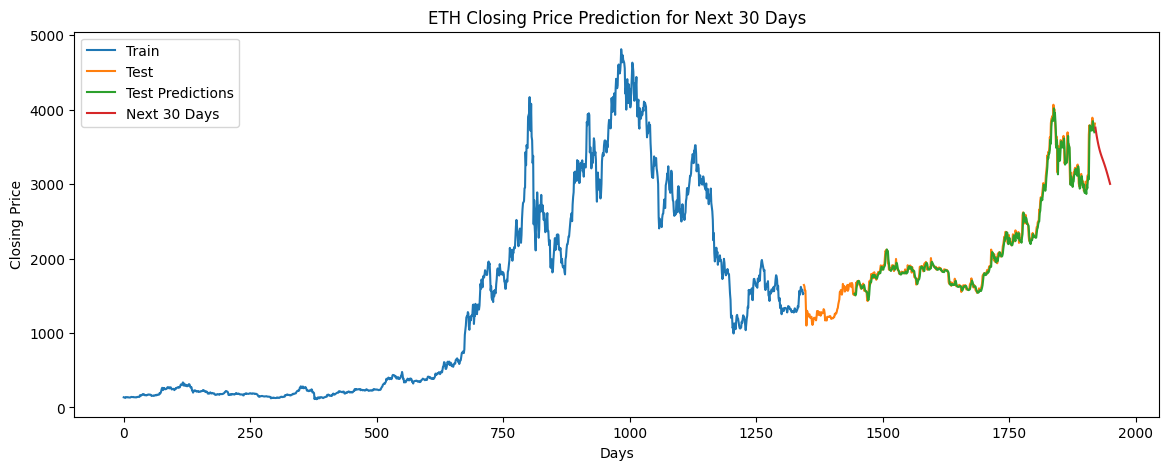

Predicted closing prices for the next 30 days:
[3759.186  3712.752  3668.3447 3629.0408 3592.0444 3557.1372 3524.642
 3494.7292 3467.3325 3442.2236 3419.0757 3397.5083 3377.1223 3357.5261
 3338.357  3319.295  3300.0771 3280.4922 3260.389  3239.6682 3218.2822
 3196.2249 3173.5264 3150.2422 3126.4478 3102.2312 3077.6863 3052.9062
 3027.979  3002.9905]


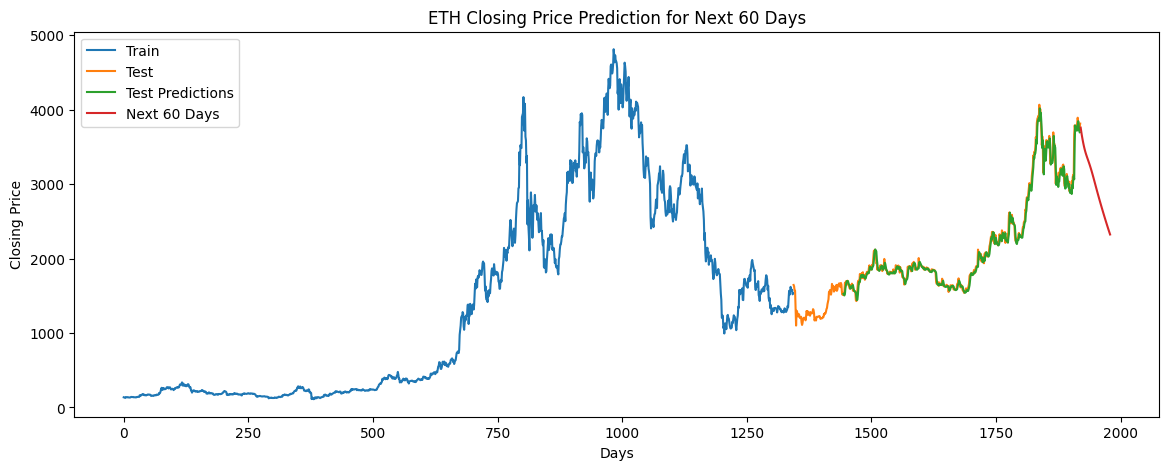

Predicted closing prices for the next 60 days:
[3759.186  3712.752  3668.3447 3629.0408 3592.0444 3557.1372 3524.642
 3494.7292 3467.3325 3442.2236 3419.0757 3397.5083 3377.1223 3357.5261
 3338.357  3319.295  3300.0771 3280.4922 3260.389  3239.6682 3218.2822
 3196.2249 3173.5264 3150.2422 3126.4478 3102.2312 3077.6863 3052.9062
 3027.979  3002.9905 2978.0095 2953.096  2928.2993 2903.6553 2879.1892
 2854.9177 2830.8477 2806.9824 2783.3167 2759.8425 2736.5513 2713.4333
 2690.4783 2667.6782 2645.025  2622.5132 2600.1414 2577.9065 2555.8103
 2533.8574 2512.051  2490.3967 2468.9023 2447.575  2426.422  2405.4526
 2384.673  2364.0908 2343.7148 2323.5513]


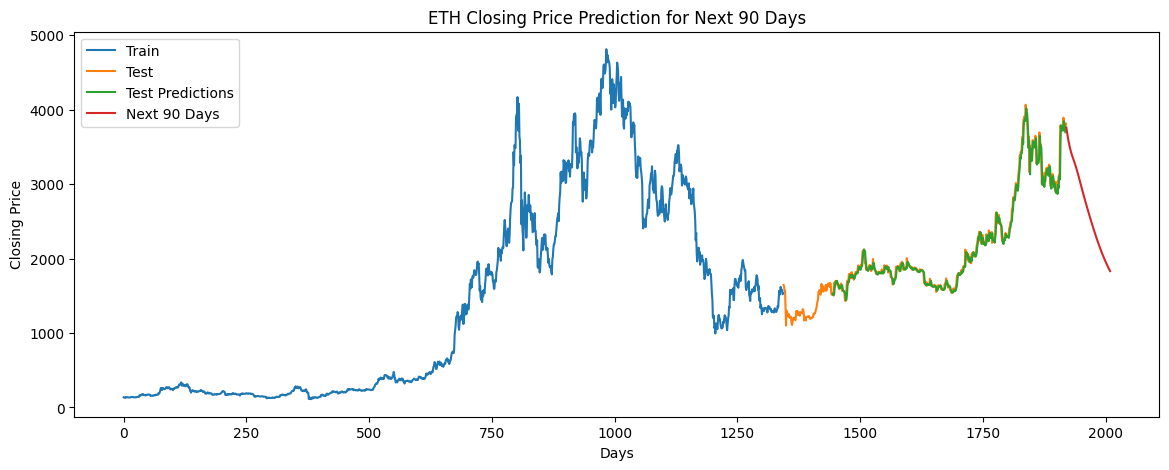

Predicted closing prices for the next 90 days:
[3759.186  3712.752  3668.3447 3629.0408 3592.0444 3557.1372 3524.642
 3494.7292 3467.3325 3442.2236 3419.0757 3397.5083 3377.1223 3357.5261
 3338.357  3319.295  3300.0771 3280.4922 3260.389  3239.6682 3218.2822
 3196.2249 3173.5264 3150.2422 3126.4478 3102.2312 3077.6863 3052.9062
 3027.979  3002.9905 2978.0095 2953.096  2928.2993 2903.6553 2879.1892
 2854.9177 2830.8477 2806.9824 2783.3167 2759.8425 2736.5513 2713.4333
 2690.4783 2667.6782 2645.025  2622.5132 2600.1414 2577.9065 2555.8103
 2533.8574 2512.051  2490.3967 2468.9023 2447.575  2426.422  2405.4526
 2384.673  2364.0908 2343.7148 2323.5513 2303.6047 2283.8818 2264.3872
 2245.125  2226.0994 2207.3132 2188.7693 2170.4695 2152.4175 2134.6138
 2117.0603 2099.7588 2082.71   2065.915  2049.3748 2033.0894 2017.0602
 2001.2871 1985.7706 1970.5104 1955.5068 1940.759  1926.2668 1912.029
 1898.0455 1884.3156 1870.836  1857.6078 1844.6283 1831.8954]


In [25]:
# 13. Dự đoán 30, 60, 90 ngày tiếp theo
def predict_future(model, data, time_step, days):
    temp_input = list(data[:, 0])  # Extract the values as a 1D list
    lst_output = []
    i = 0
    while(i < days):
        if(len(temp_input) > time_step):
            x_input = np.array(temp_input[-time_step:])
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.append(yhat[0][0])  # Append the single predicted value
            lst_output.append(yhat[0][0])
            i = i + 1
        else:
            x_input = np.array(temp_input)
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.append(yhat[0][0])  # Append the single predicted value
            lst_output.append(yhat[0][0])
            i = i + 1
    return np.array(lst_output).reshape(-1, 1)

last_100_days = df1[-time_step:]
future_days = [30, 60, 90]
for days in future_days:
    future_predictions = predict_future(model, last_100_days, time_step, days)
    future_predictions = scaler.inverse_transform(future_predictions)

    # Vẽ hình
    plt.figure(figsize=(14, 5))
    plt.plot(range(len(train_data)), scaler.inverse_transform(train_data), label='Train')
    plt.plot(range(len(train_data), len(train_data) + len(test_data)), scaler.inverse_transform(test_data), label='Test')
    plt.plot(range(len(train_data) + time_step, len(train_data) + time_step + len(y_pred)), y_pred, label='Test Predictions')
    future_index = range(len(df1), len(df1) + days)
    plt.plot(future_index, future_predictions, label=f'Next {days} Days')

    plt.xlabel('Days')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.title(f'ETH Closing Price Prediction for Next {days} Days')
    plt.show()

    print(f'Predicted closing prices for the next {days} days:')
    print(future_predictions.flatten())

# **6:4**

In [26]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('Eth.csv')
df1=df.reset_index()['Close']
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-01,136.836243,138.995270,136.434784,136.443619,136.443619,3756124824
1,2019-03-02,136.350082,137.184799,132.436386,134.206955,134.206955,3747176425
2,2019-03-03,134.786118,135.849289,131.328857,132.249420,132.249420,3454374053
3,2019-03-04,132.157883,132.729141,125.402702,127.774124,127.774124,4008171341
4,2019-03-05,127.792953,138.229980,126.735298,137.822388,137.822388,4764849990
...,...,...,...,...,...,...,...
1915,2024-05-28,3892.096924,3924.895752,3771.213867,3840.256348,3840.256348,19846044324
1916,2024-05-29,3840.235107,3880.648438,3742.041260,3763.196533,3763.196533,17411416736
1917,2024-05-30,3763.357666,3823.643311,3702.263672,3746.849609,3746.849609,15065849797
1918,2024-05-31,3746.861572,3843.857666,3723.835205,3760.026611,3760.026611,15290700646


In [27]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [28]:
# 4. Chia train test
train_size = int(0.6 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

In [29]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [30]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [31]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [32]:
# 8. Define LSTM Model

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [33]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
17/17 [==============================] - 11s 270ms/step - loss: 0.0458 - val_loss: 0.0073
Epoch 2/100
17/17 [==============================] - 3s 193ms/step - loss: 0.0049 - val_loss: 0.0019
Epoch 3/100
17/17 [==============================] - 4s 222ms/step - loss: 0.0035 - val_loss: 0.0019
Epoch 4/100
17/17 [==============================] - 6s 333ms/step - loss: 0.0032 - val_loss: 0.0020
Epoch 5/100
17/17 [==============================] - 3s 191ms/step - loss: 0.0029 - val_loss: 0.0017
Epoch 6/100
17/17 [==============================] - 3s 194ms/step - loss: 0.0027 - val_loss: 0.0017
Epoch 7/100
17/17 [==============================] - 4s 261ms/step - loss: 0.0025 - val_loss: 0.0015
Epoch 8/100
17/17 [==============================] - 4s 205ms/step - loss: 0.0026 - val_loss: 0.0018
Epoch 9/100
17/17 [==============================] - 3s 194ms/step - loss: 0.0023 - val_loss: 0.0014
Epoch 10/100
17/17 [==============================] - 3s 195ms/step - loss: 0.0022 - val_l

In [34]:
# 10. Dự báo dữ liệu test
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

21/21 [==============================] - 1s 39ms/step


In [35]:
# 11. Chuẩn hóa dữ liệu
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
ytest = scaler.inverse_transform(ytest.reshape(-1,1))

In [36]:
# 12. Đánh giá độ chính xác thuật toán
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)

test_mae = np.mean(abs(y_pred - ytest))
print('Testing MAE:', test_mae)

test_mape = np.mean(np.abs(y_pred - ytest)/np.abs(y_pred))
print('Testing MAPE:', test_mape)

Testing RMSE: 81.88295212596863
Testing MAE: 53.24095032561838
Testing MAPE: 0.025730778005615393


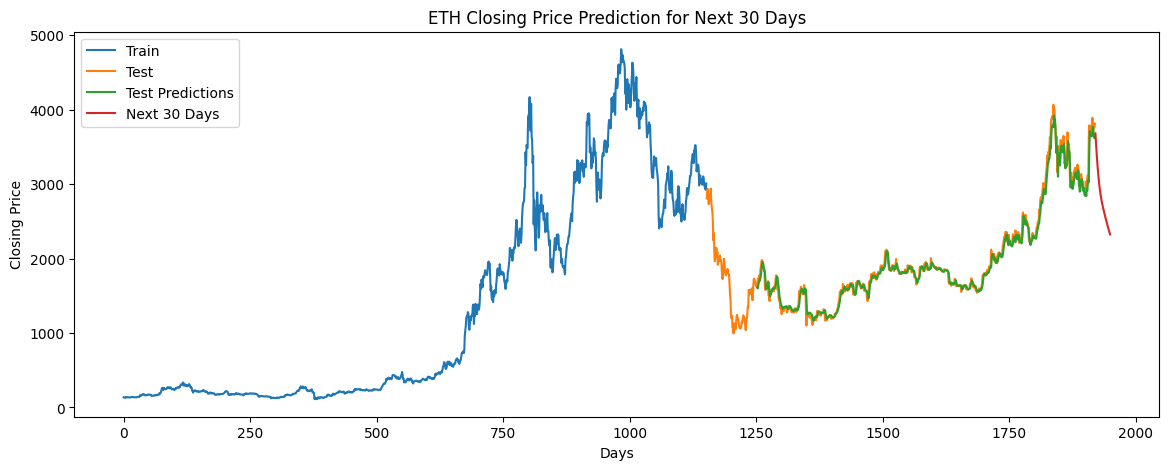

Predicted closing prices for the next 30 days:
[3681.4375 3574.562  3463.1938 3360.253  3265.373  3179.1157 3101.6562
 3032.7234 2971.682  2917.6614 2869.6807 2826.7478 2787.9253 2752.3706
 2719.3557 2688.2695 2658.6157 2630.005  2602.145  2574.8281 2547.921
 2521.3506 2495.096  2469.1743 2443.6318 2418.5317 2393.9507 2369.965
 2346.6497 2324.0708]


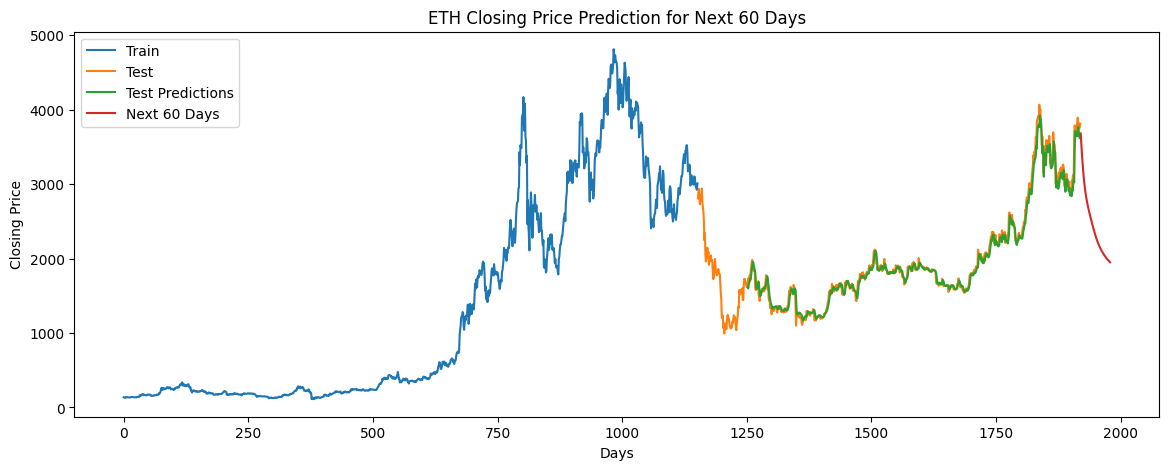

Predicted closing prices for the next 60 days:
[3681.4375 3574.562  3463.1938 3360.253  3265.373  3179.1157 3101.6562
 3032.7234 2971.682  2917.6614 2869.6807 2826.7478 2787.9253 2752.3706
 2719.3557 2688.2695 2658.6157 2630.005  2602.145  2574.8281 2547.921
 2521.3506 2495.096  2469.1743 2443.6318 2418.5317 2393.9507 2369.965
 2346.6497 2324.0708 2302.2825 2281.3254 2261.2268 2241.9968 2223.634
 2206.1248 2189.4448 2173.561  2158.435  2144.0232 2130.281  2117.1626
 2104.6228 2092.619  2081.1099 2070.058  2059.4304 2049.1958 2039.3287
 2029.8044 2020.6035 2011.7083 2003.1036 1994.7755 1986.7133 1978.9064
 1971.3453 1964.0211 1956.9265 1950.0527]


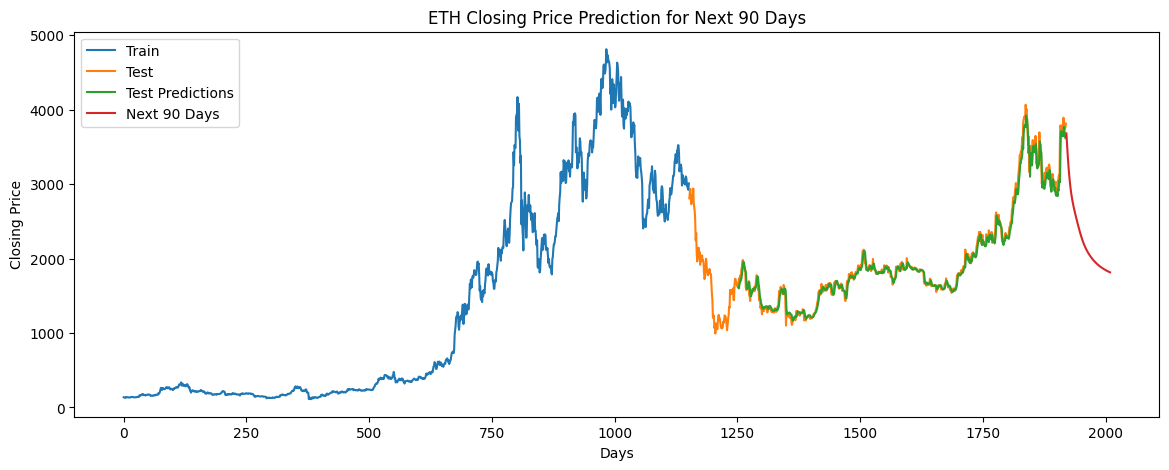

Predicted closing prices for the next 90 days:
[3681.4375 3574.562  3463.1938 3360.253  3265.373  3179.1157 3101.6562
 3032.7234 2971.682  2917.6614 2869.6807 2826.7478 2787.9253 2752.3706
 2719.3557 2688.2695 2658.6157 2630.005  2602.145  2574.8281 2547.921
 2521.3506 2495.096  2469.1743 2443.6318 2418.5317 2393.9507 2369.965
 2346.6497 2324.0708 2302.2825 2281.3254 2261.2268 2241.9968 2223.634
 2206.1248 2189.4448 2173.561  2158.435  2144.0232 2130.281  2117.1626
 2104.6228 2092.619  2081.1099 2070.058  2059.4304 2049.1958 2039.3287
 2029.8044 2020.6035 2011.7083 2003.1036 1994.7755 1986.7133 1978.9064
 1971.3453 1964.0211 1956.9265 1950.0527 1943.3936 1936.9395 1930.6848
 1924.6218 1918.7433 1913.0424 1907.5112 1902.1443 1896.9338 1891.8739
 1886.9585 1882.1812 1877.5366 1873.0193 1868.6241 1864.3462 1860.1808
 1856.1244 1852.1727 1848.3217 1844.568  1840.908  1837.3394 1833.8586
 1830.4626 1827.1493 1823.9156 1820.7593 1817.6783 1814.6703]


In [37]:
# 13. Dự đoán 30, 60, 90 ngày tiếp theo
def predict_future(model, data, time_step, days):
    temp_input = list(data[:, 0])  # Extract the values as a 1D list
    lst_output = []
    i = 0
    while(i < days):
        if(len(temp_input) > time_step):
            x_input = np.array(temp_input[-time_step:])
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.append(yhat[0][0])  # Append the single predicted value
            lst_output.append(yhat[0][0])
            i = i + 1
        else:
            x_input = np.array(temp_input)
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.append(yhat[0][0])  # Append the single predicted value
            lst_output.append(yhat[0][0])
            i = i + 1
    return np.array(lst_output).reshape(-1, 1)

last_100_days = df1[-time_step:]
future_days = [30, 60, 90]
for days in future_days:
    future_predictions = predict_future(model, last_100_days, time_step, days)
    future_predictions = scaler.inverse_transform(future_predictions)

    # Vẽ hình
    plt.figure(figsize=(14, 5))
    plt.plot(range(len(train_data)), scaler.inverse_transform(train_data), label='Train')
    plt.plot(range(len(train_data), len(train_data) + len(test_data)), scaler.inverse_transform(test_data), label='Test')
    plt.plot(range(len(train_data) + time_step, len(train_data) + time_step + len(y_pred)), y_pred, label='Test Predictions')
    future_index = range(len(df1), len(df1) + days)
    plt.plot(future_index, future_predictions, label=f'Next {days} Days')

    plt.xlabel('Days')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.title(f'ETH Closing Price Prediction for Next {days} Days')
    plt.show()

    print(f'Predicted closing prices for the next {days} days:')
    print(future_predictions.flatten())